In [ ]:
!pip install pydub
!pip install gtts
import os, math, imghdr, tempfile, sys, time
from pathlib import Path
from gtts import gTTS
from PIL import Image
from pydub import AudioSegment

  Created wheel for gtts-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4096 sha256=aadd043ac7aaadf73c91f37577e6166051ffcee7ddbf6ff503678638e54a6d20
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gtts-token


In [ ]:
def basenameNoExt(filename):
    """ e.g. /foo/bar/baz.txt returns baz """
    return os.path.splitext(os.path.basename(filename))[0]

In [ ]:
data_path = '/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/Healthy_Control/'
extension = 'wav'
basedir = '/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/'

for file in Path(data_path).glob("**/*.wav"):
  print(file)
  track = AudioSegment.from_file(file, extension)
  sampleRate = track.frame_rate
  tracklen = len(track)
  print(tracklen)
  overlap = 2.5*1000
  chunkBaseLength = 2.5*1000
  num_segments = int(math.ceil(tracklen / chunkBaseLength))
  basename = basenameNoExt(basedir)

  for i in range(0, num_segments):
    start_time = i*chunkBaseLength
    end_time = min((i+1)*chunkBaseLength+overlap, tracklen)
    curr_track = track[start_time:end_time]
    print(start_time)
    print(end_time)
    track_name_split = basedir.split('/')
    head, tail = os.path.split(file)
    fname = os.path.splitext(tail)[0]
    filename = basedir + fname + '_' + str(i) + '.wav'
    curr_track.export(filename, format="wav")
    print(filename)



/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/Healthy_Control/ID00_hc_0_0_0.wav
40775
0.0
5000.0
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/ID00_hc_0_0_0_0.wav
2500.0
7500.0
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/ID00_hc_0_0_0_1.wav
5000.0
10000.0
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/ID00_hc_0_0_0_2.wav
7500.0
12500.0
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/ID00_hc_0_0_0_3.wav
10000.0
15000.0
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/ID00_hc_0_0_0_4.wav
12500.0
17500.0
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/ID00_hc_0_0_0_5.wav
15000.0
20000.0
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/ID00_hc_0_0_0_6.wav
17

In [ ]:
import glob
import os.path
import os
import matplotlib
import pylab
import librosa
import librosa.display
import numpy as np

for file in glob.glob("/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/*.wav"):
  sig, fs = librosa.load(file)   
  head, tail = os.path.split(file)
  imageName = os.path.splitext(tail)[0]
  
  if "_hc_" in file:
    save_path = '/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/Healthy_Control/' + imageName + '.jpg'
    print(save_path)
  elif "_pd_" in file:
    save_path = '/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/Parkinsons_Disease/' + imageName + '.jpg'
    print(save_path)

  pylab.axis('off') 
  pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
  melspec = librosa.feature.melspectrogram(y=sig, sr=fs, hop_length=512, n_fft=1024, n_mels=128)
  librosa.display.specshow(librosa.power_to_db(melspec, ref=np.max))
  pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
  pylab.close()

/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/Parkinsons_Disease/ID13_pd_3_2_2_0.jpg
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/Parkinsons_Disease/ID13_pd_3_2_2_1.jpg
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/Parkinsons_Disease/ID13_pd_3_2_2_2.jpg
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/Parkinsons_Disease/ID13_pd_3_2_2_3.jpg
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/Parkinsons_Disease/ID13_pd_3_2_2_4.jpg
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/Parkinsons_Disease/ID13_pd_3_2_2_5.jpg
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Segments_50_overlap/Parkinsons_Disease/ID13_pd_3_2_2_6.jpg
/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Read_Text/5_Second_Seg

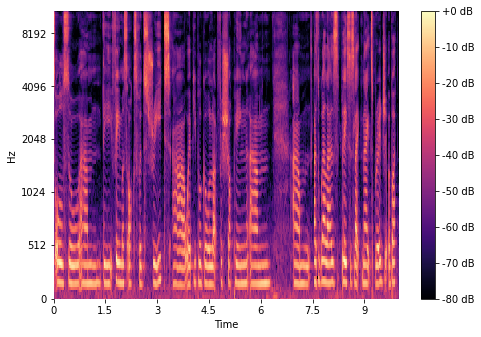

In [ ]:
import glob
import os.path
import os
import matplotlib
import pylab
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

filename = "/content/drive/My Drive/Masters_Project/Raw_Wav_Files/Spontaneous_Dialogue/10_Second_Segments_50_overlap/ID01_hc_0_0_0_2.wav"
sig, fs = librosa.load(filename)   

pylab.axis('off') 
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
melspec = librosa.feature.melspectrogram(y=sig, sr=fs, hop_length=512, n_fft=1024, n_mels=128)
librosa.display.specshow(librosa.power_to_db(melspec, ref=np.max), sr=fs, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB');